In [2]:
library(ncdf4)
library(ggplot2)
library(dplyr)
gnss_nc= nc_open('/nas/cee-water/cjgleason/calval/Processed data/UMass/From Andy/UMass_netCDFs/SWOTCalVal_CR_GNSS_L2_Rec1_20230420T130006_20230420T170835_20230426T004903.nc')
  gnss_wse= ncvar_get(gnss_nc,'wse')
  gnss_time_tai=ncvar_get(gnss_nc,'time_tai')

dataframe_in=read.csv('/nas/cee-water/cjgleason/calval/Processed data/UMass/Munged drifts/SWOTCalVal_CR_GNSS_L2_Rec1_20230420T130006_20230420T170835_20230426T004903.csv')%>%
mutate(gnss_time_UTC=as.POSIXct(gnss_time_UTC))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




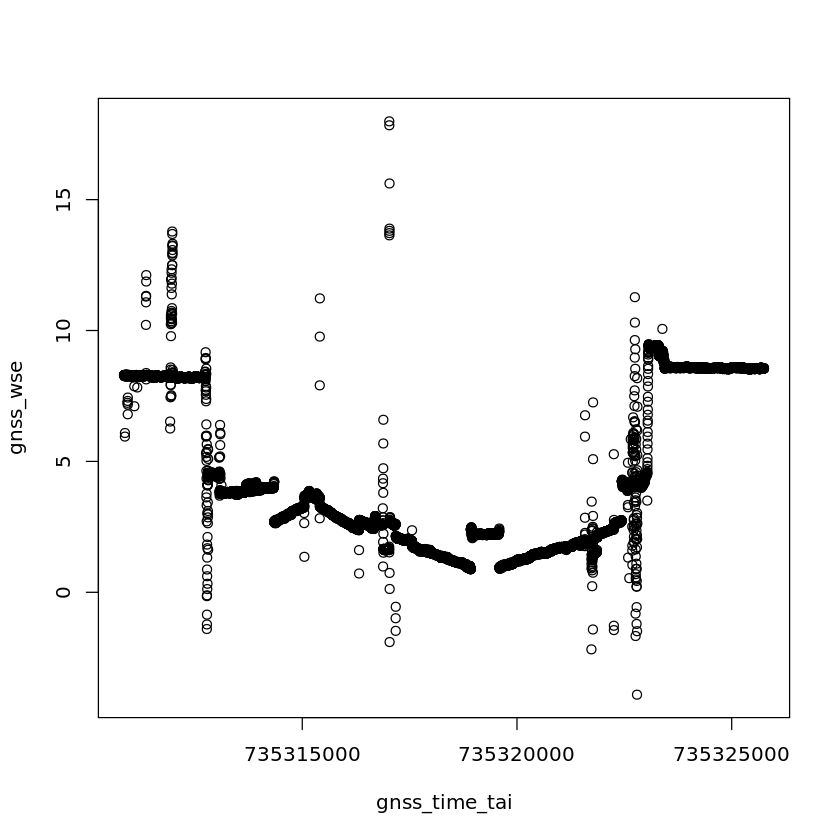

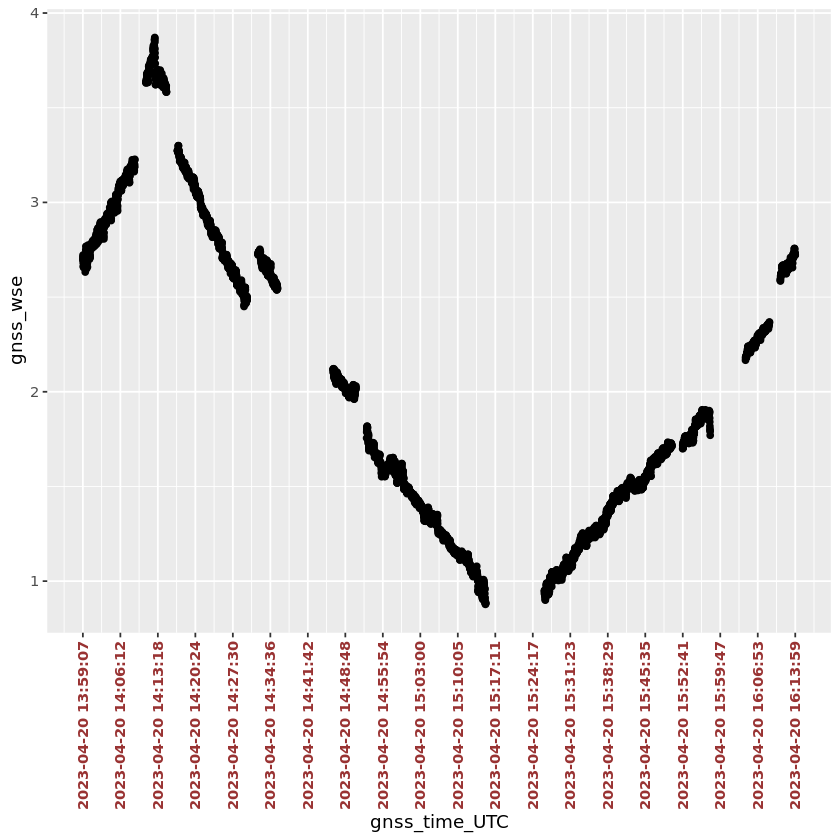

In [44]:
plot(gnss_time_tai,gnss_wse)
#head(dataframe_in)

test=ggplot(dataframe_in) +
geom_point(aes(x=gnss_time_UTC,y=gnss_wse))+
scale_x_continuous(breaks = seq(min(dataframe_in$gnss_time_UTC),max(dataframe_in$gnss_time_UTC),length.out=20))+
theme(axis.text.x = element_text(face="bold", color="#993333",angle=90,vjust=0.5,hjust=0))
plot(test)

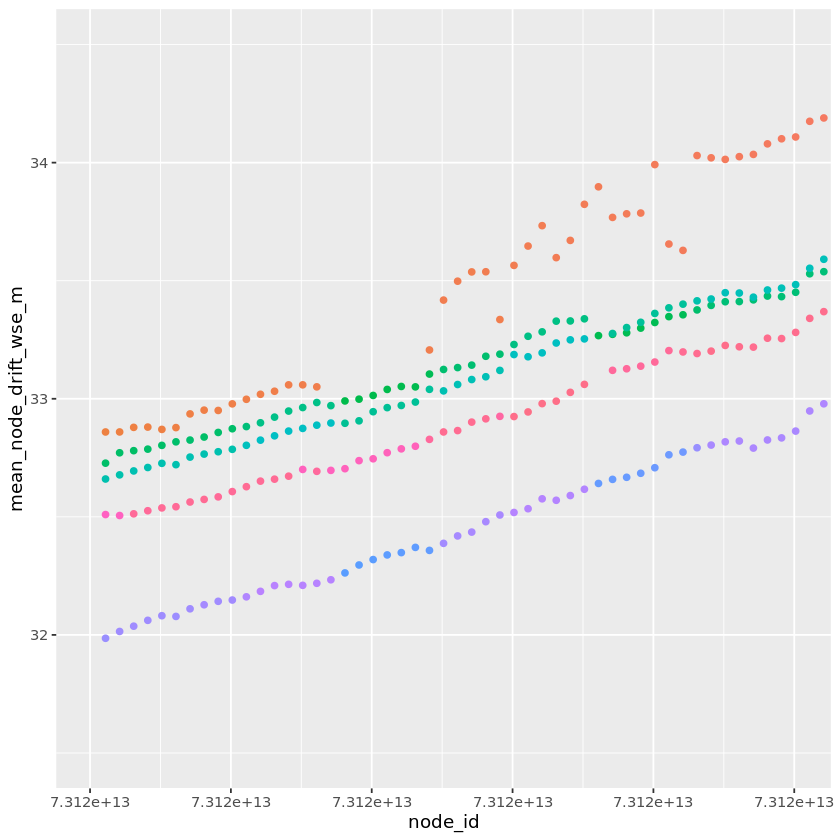

In [3]:
dataframe_in=read.csv('/nas/cee-water/cjgleason/calval/Processed data/UMass/Data frames/node/CR_drift_node_wses.csv')#%>%
# filter(reach_id==73120000171)%>%
# select(mean_reach_drift_wse_m,wse_drift_start_UTC)

test=ggplot(dataframe_in)+
geom_point(aes(x=node_id,y=mean_node_drift_wse_m,col=time_UTC))+
 theme(legend.position='none')+
coord_cartesian(xlim=c(73120000180001,73120000180501),ylim=c(31.5,34.5))

#head(dataframe_in)
plot(test)